In [22]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn

from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [8]:
X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression().fit(X_train, y_train)
print('Test set score: {:.2f}'.format(logreg.score(X_test, y_test)))

Test set score: 0.88


# 模型评估与改进

## 交叉验证

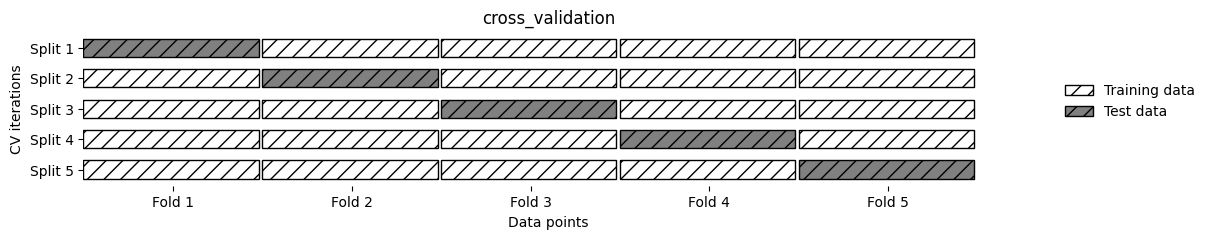

In [11]:
mglearn.plots.plot_cross_validation()

### scikit-learn中的交叉验证

In [19]:
iris = load_iris()
logreg = LogisticRegression(max_iter=1_000)
scores = cross_val_score(logreg, iris.data, iris.target)
print('Cross-validation scores: {}'.format(scores))

scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Average cross-validation score: 0.97


In [27]:
res = cross_validate(logreg, iris.data, iris.target, cv=5,
                     return_train_score=True)
res_df = pd.DataFrame(res)
res_df

,fit_time,score_time,test_score,train_score
0,0.009817,0.001001,0.966667,0.966667
1,0.012455,0.000000,1.000000,0.966667
2,0.008724,0.000000,0.933333,0.983333
3,0.010455,0.000000,0.966667,0.983333
4,0.010130,0.000000,1.000000,0.975000


In [28]:
print('Mean times and scores: \n',res_df.mean(axis=0))

Mean times and scores: 
 fit_time       0.010316
score_time     0.000200
test_score     0.973333
train_score    0.975000
dtype: float64


### 交叉验证的优点

### 分层k折交叉验证和其他策略

#### 对交叉验证的更多控制

#### 留一法交叉验证

#### 打乱划分交叉验证

#### 分组交叉验证

## 网格搜索

### 简单网格搜索

### 参数过拟合的风险与验证集

### 带交叉验证的网格搜索

#### 分析交叉验证的结果

#### 在非网格的空间中搜索

#### 使用不同的交叉验证策略进行网格搜索

## 评估指标与评分

### 牢记最终目标

### 二分类指标

#### 错误类型

#### 不平衡数据集

#### 混淆矩阵

#### 考虑不确定性

#### 准确率-召回率曲线

#### 受试者工作特征（ROC）与AUC

### 多分类指标

### 回归指标

### 在模型选择中使用评估指标

## 小结与展望